In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

In [6]:
def rosenbrock(x:np.ndarray):
#   Define the object function
    return 100.0 * (x[1] - x[0]**2)**2 + (1.0 - x[0])**2

In [7]:
def grad_rosenbrock(x:np.ndarray):
#   Gradient of the Rosenbrock function.

    x_val, y_val = x[0], x[1]
    df_dx = -400.0 * x_val * (y_val - x_val**2) - 2.0 * (1.0 - x_val)
    df_dy =  200.0 * (y_val - x_val**2)
    return np.array([df_dx, df_dy])

def hess_rosenbrock(x:np.ndarray):
#   Hessian of the Rosenbrock function.

    x_val, y_val = x[0], x[1]
    d2f_dx2 = 1200.0 * x_val**2 - 400.0 * y_val + 2.0
    d2f_dy2 = 200.0
    d2f_dxdy = -400.0 * x_val
    return np.array([[d2f_dx2, d2f_dxdy],
                     [d2f_dxdy, d2f_dy2]])

In [8]:
def gradient_descent(x0:np.ndarray, tol=1e-6, max_iter=10000):

    x_path = [x0]
    x = x0

    for _ in range(max_iter):
        J = grad_rosenbrock(x)
        f0 = rosenbrock(x)
        J_norm = np.linalg.norm(J)

        if J_norm < tol:
            break

        # Descent direction is the negative gradient
        p = -J

        # Find alpha that satisfies strong Wolfe conditions
        # Default c1=1e-4, c2=0.9
        alpha, _, _, _, _, _ = line_search(
            f=rosenbrock, myfprime=grad_rosenbrock, xk=x, pk=p, gfk=J, old_fval=f0
        )

        x = x + alpha * p
        x_path.append(x)

    return x_path

In [ ]:
def newton_method(x0, tol=1e-6, max_iter=10000):

    x_path = [x0]
    x = x0

    for _ in range(max_iter):
        J = grad_rosenbrock(x)
        H = hess_rosenbrock(x)
        f0 = rosenbrock(x)
        J_norm = np.linalg.norm(J)

        if J_norm < tol:
            break

        try:
            p = -np.linalg.solve(H, J)
        except np.linalg.LinAlgError:
            # fallback to a gradient descent direction
            p = -J

        # Find alpha that satisfies strong Wolfe conditions
        # Default c1=1e-4, c2=0.9
        alpha, _, _, _, _, _ = line_search(
            f=rosenbrock, myfprime=grad_rosenbrock, xk=x, pk=p, gfk=J, old_fval=f0
        )

        x = x + alpha * p
        x_path.append(x)

    return x_path

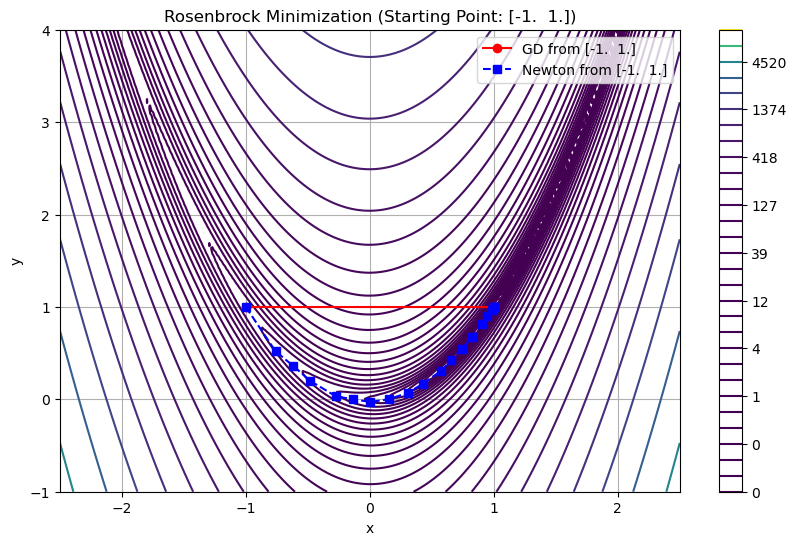

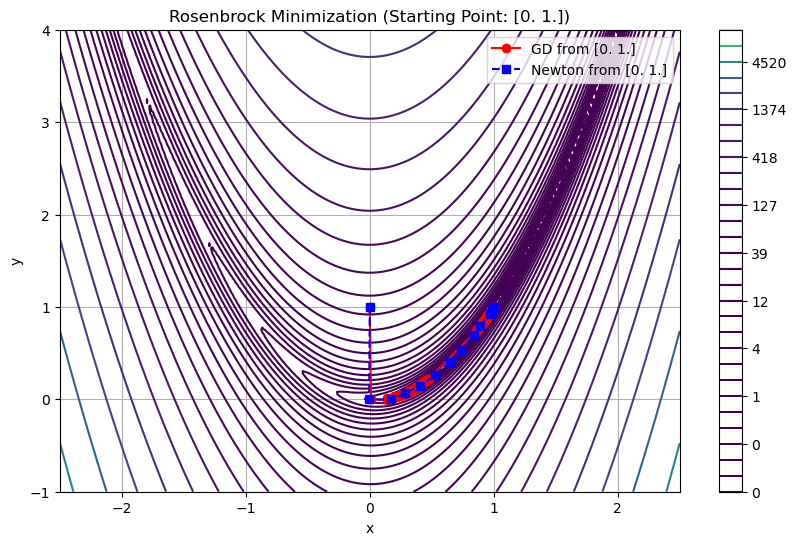

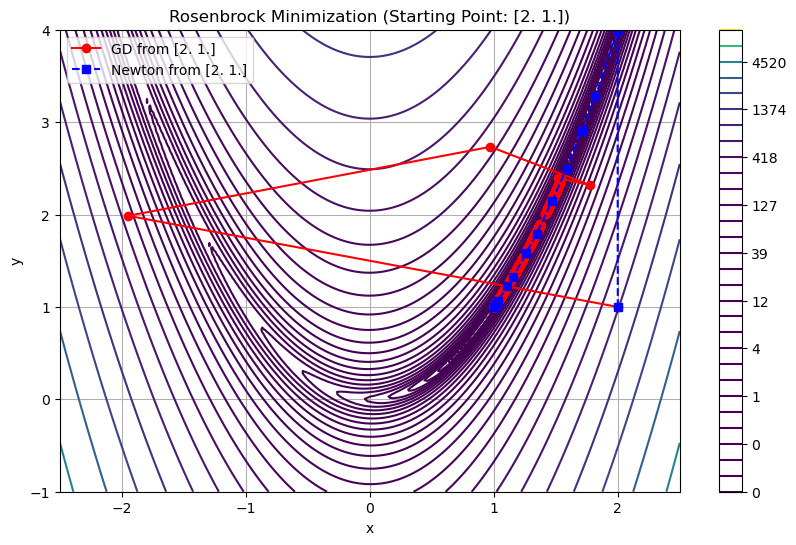

In [17]:
start_points = [
    np.array([-1.0, 1.0]),
    np.array([ 0.0, 1.0]),
    np.array([ 2.0, 1.0])
]

gd_paths = []
newton_paths = []

for sp in start_points:
    gd_path = gradient_descent(sp)
    newt_path = newton_method(sp)
    gd_paths.append(gd_path)
    newton_paths.append(newt_path)


x_vals = np.linspace(-2.5, 2.5, 200)
y_vals = np.linspace(-1, 4, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 100.0 * (Y - X**2)**2 + (1.0 - X)**2

for i, sp in enumerate(start_points):
    plt.figure(figsize=(10, 6))
    # Contour plot of Rosenbrock
    ct = plt.contour(X, Y, Z, levels=np.logspace(-1, 4, 30), cmap='viridis')
    # Display the colormap bar
    plt.colorbar(ct)

    gd_path = np.array(gd_paths[i])
    newt_path = np.array(newton_paths[i])

    plt.plot(gd_path[:, 0], gd_path[:, 1],
             color='r', marker='o', label=f"GD from {sp}")
    plt.plot(newt_path[:, 0], newt_path[:, 1],
             color='b', marker='s', linestyle='--', label=f"Newton from {sp}")
    
    plt.title(f"Rosenbrock Minimization (Starting Point: {sp})")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()